In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **1) Interpolation**

In [4]:
from scipy.interpolate import  interp1d

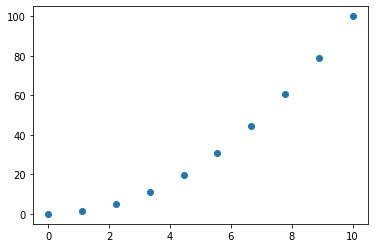

In [2]:
x = np.linspace(0, 10, 10)
y = x**2
plt.scatter(x, y)

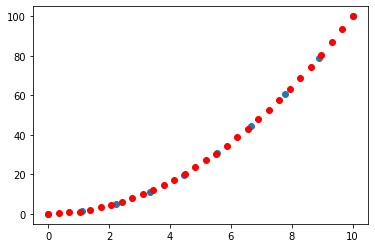

In [5]:
f = interp1d(x, y, kind='linear')

new_x = np.linspace(0, 10, 30)
result = f(new_x)

plt.scatter(x, y)
plt.scatter(new_x, result, c='r')

# **2) Optimize**

In [6]:
from scipy import optimize

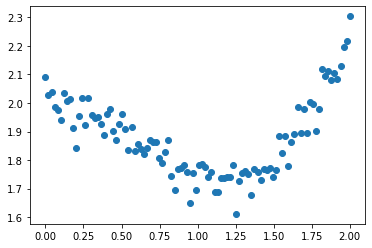

In [7]:
x = np.linspace(0, 2, 100)
y = 1/3*x**3 - 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x, y)

**Choisissons un modele f:**
f(x) = ax^3 + bx^2 + cx +d

In [8]:
def f(x, a, b, c, d):
  F = a*x**3 + b*x**2 + c*x +d
  return F

In [9]:
optimize.curve_fit(f, x, y)

(array([ 0.29750908, -0.49956781, -0.06532662,  2.01313396]),
 array([[ 0.00087228, -0.00261684,  0.00208297, -0.00033841],
        [-0.00261684,  0.00807916, -0.0067062 ,  0.00116612],
        [ 0.00208297, -0.0067062 ,  0.00595082, -0.00117208],
        [-0.00033841,  0.00116612, -0.00117208,  0.0003142 ]]))

In [10]:
params, params_cov = optimize.curve_fit(f, x, y)

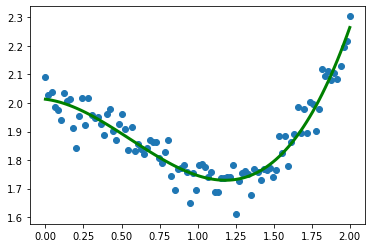

In [11]:
plt.scatter(x, y)
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), c='g', lw=3)

# **Minimisation**
f = x^2 + 15*sin(x1)

In [12]:
def f1(x1):
  F1 = x1**2 + 15*np.sin(x1)
  return F1

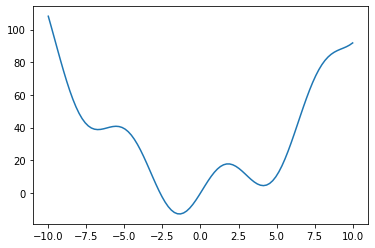

In [13]:
x1 = np.linspace(-10, 10, 100)
plt.plot(x1, f1(x1))

In [14]:
optimize.minimize(f1, x0=-8)

      fun: 38.81120617595851
 hess_inv: array([[0.11637184]])
      jac: array([4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([-6.73789948])

In [15]:
optimize.minimize(f1, x0=-5)

      fun: -12.823616887804443
 hess_inv: array([[0.05978682]])
      jac: array([3.57627869e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 9
   status: 0
  success: True
        x: array([-1.38505584])

In [16]:
x0 = -5
result1 = optimize.minimize(f1, x0=x0).x

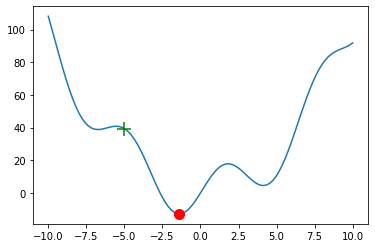

In [17]:
plt.plot(x1, f1(x1), zorder=-1)
plt.scatter(result1, f1(result1), s=100, c='r', zorder=1)
plt.scatter(x0, f1(x0), s=200, marker='+', c='g', zorder=1)

In [19]:
def f2(x2):
  F2 = np.sin(x2[0]) + np.cos(x2[0]+x2[1])*np.cos(x2[0])
  return F2

[-0.78539917 -2.35619341]


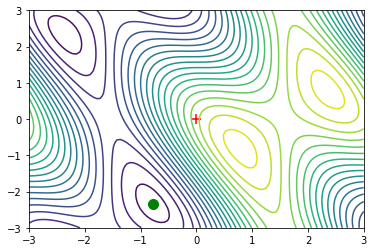

In [20]:
x2 = np.linspace(-3, 3, 100)
y2 = np.linspace(-3, 3, 100)

x2, y2 = np.meshgrid(x2, y2)
plt.contour(x2, y2, f2(np.array([x2, y2])), 20)

x0 = np.zeros((2,1))
plt.scatter(x0[0], x0[1], marker='+', c='r', s=100)

result2 = optimize.minimize(f2, x0=x0).x

plt.scatter(result2[0], result2[1], s=100, c='g', zorder=1)
print(result2)

# **Signal / fft**


In [21]:
from scipy import  signal
from scipy import fftpack

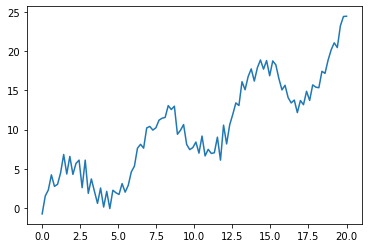

In [22]:
x3 = np.linspace(0, 20, 100)
y3 = x3 + 4*np.sin(x3) + np.random.randn(x3.shape[0])
plt.plot(x3, y3)

In [23]:
new_y3 = signal.detrend(y3)

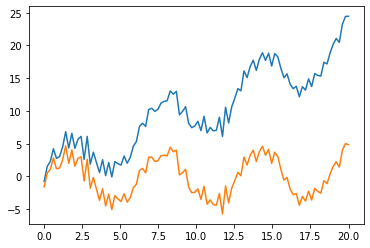

In [24]:
plt.plot(x3, y3)
plt.plot(x3, new_y3)

# **Transformation de Fourier**

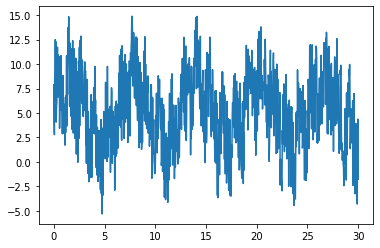

In [25]:
x4 = np.linspace(0, 30, 1000)
y4 = 3*np.sin(x4) + 2*np.sin(5*x4) + np.sin(10*x4) + np.random.random(x4.shape[0])*10
plt.plot(x4, y4)

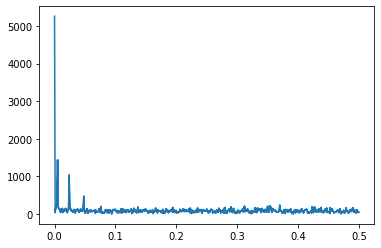

In [26]:
fourier = fftpack.fft(y4)
power = np.abs(fourier)
frequences = fftpack.fftfreq(y4.size)
plt.plot(np.abs(frequences), power)

In [27]:
fourier[power<400] = 0

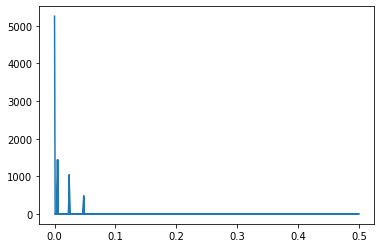

In [28]:
plt.plot(np.abs(frequences), np.abs(fourier))

In [29]:
filtered_signal = fftpack.ifft(fourier)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


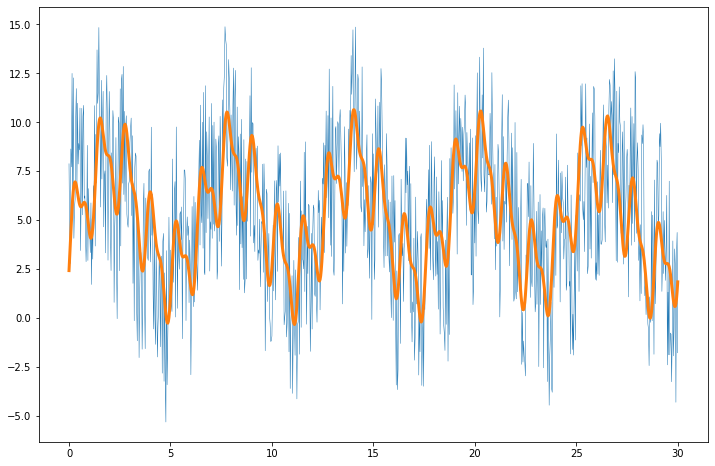

In [30]:
plt.figure(figsize=(12, 8))
plt.plot(x4, y4, lw=0.5)
plt.plot(x4, filtered_signal, lw=3)
plt.show()

# **Traitement d'image**

In [31]:
from scipy import ndimage

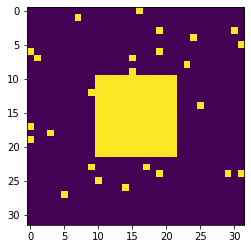

In [32]:
np.random.seed(0)
x5 = np.zeros((32, 32))
x5[10:-10, 10:-10] = 1
x5[np.random.randint(0, 32, 30), np.random.randint(0, 32, 30)] = 1
plt.imshow(x5)

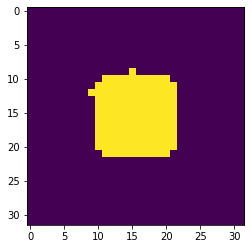

In [33]:
open_x = ndimage.binary_opening(x5)
plt.imshow(open_x)

(345, 400)

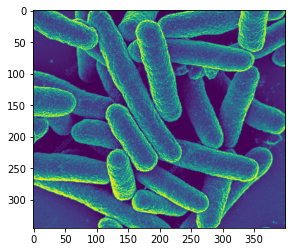

In [ ]:
image = plt.imread('Microbe1.jpg')
image = image[:,:,0]
plt.imshow(image)
image.shape

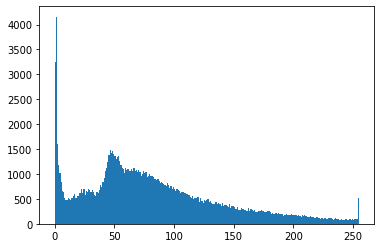

In [ ]:
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255)
plt.show()

In [ ]:
#image = image>45
image = image<60
image

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

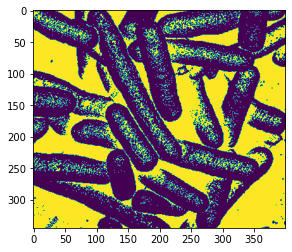

In [ ]:
plt.imshow(image)

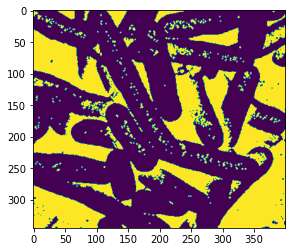

In [ ]:
open_x = ndimage.binary_opening(image)
plt.imshow(open_x)

In [ ]:
label_image, n_labels = ndimage.label(open_x)
print(n_labels)
print(label_image)

279
[[  0   1   1 ...   0   0   0]
 [  1   1   1 ...   0   0   0]
 [  1   1   1 ...   0   0   0]
 ...
 [262 262 262 ... 117 117 117]
 [262 262 262 ... 117 117 117]
 [  0 262 262 ... 117 117   0]]


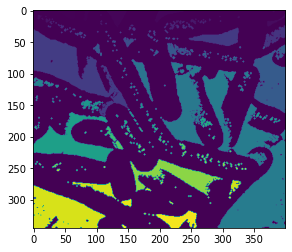

In [ ]:
plt.imshow(label_image)

In [ ]:
sizes = ndimage.sum(open_x, label_image, range(n_labels))

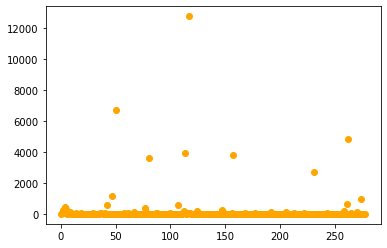

In [ ]:
plt.scatter(range(n_labels), sizes, c='orange')